In [1]:
path=r"C:\Users\HP\myData"

In [2]:
labelsFile=r'C:\Users\HP\labels\labels.csv'

In [3]:
import os
import cv2
import numpy as np

In [4]:
myList=os.listdir(path)

In [5]:
noOfClasses=len(myList)

In [6]:
noOfClasses

43

In [7]:
print("Importing Classes...")

Importing Classes...


In [8]:
images=[]
classNo=[]
print("Importing Classes...")
for i in range(0,noOfClasses):
    myPicList=os.listdir(path+"/" + str(i))
    for y in myPicList:
        img=cv2.imread(path+"/" + str(i)+ "/"+y)
        images.append(img)
        classNo.append(i)
    print(i,"Done")

Importing Classes...
0 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done
16 Done
17 Done
18 Done
19 Done
20 Done
21 Done
22 Done
23 Done
24 Done
25 Done
26 Done
27 Done
28 Done
29 Done
30 Done
31 Done
32 Done
33 Done
34 Done
35 Done
36 Done
37 Done
38 Done
39 Done
40 Done
41 Done
42 Done


In [9]:
images=np.array(images)
classNo=np.array(classNo)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(images,classNo,test_size=0.2)

In [12]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)

In [13]:
X_train.shape

(22271, 32, 32, 3)

In [14]:
X_validation.shape

(5568, 32, 32, 3)

In [15]:
X_test.shape

(6960, 32, 32, 3)

In [16]:
import pandas as pd
data=pd.read_csv(r'C:\Users\HP\labels.csv')

In [17]:
data

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [18]:
for i,j in data.iterrows():
    print(i,j)

0 ClassId                       0
Name       Speed limit (20km/h)
Name: 0, dtype: object
1 ClassId                       1
Name       Speed limit (30km/h)
Name: 1, dtype: object
2 ClassId                       2
Name       Speed limit (50km/h)
Name: 2, dtype: object
3 ClassId                       3
Name       Speed limit (60km/h)
Name: 3, dtype: object
4 ClassId                       4
Name       Speed limit (70km/h)
Name: 4, dtype: object
5 ClassId                       5
Name       Speed limit (80km/h)
Name: 5, dtype: object
6 ClassId                              6
Name       End of speed limit (80km/h)
Name: 6, dtype: object
7 ClassId                        7
Name       Speed limit (100km/h)
Name: 7, dtype: object
8 ClassId                        8
Name       Speed limit (120km/h)
Name: 8, dtype: object
9 ClassId             9
Name       No passing
Name: 9, dtype: object
10 ClassId                                              10
Name       No passing for vechiles over 3.5 metric to

In [19]:
import matplotlib.pyplot as plt
import random

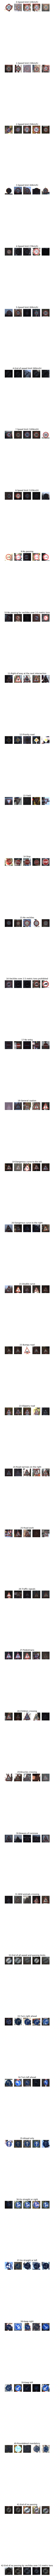

In [20]:
num_samples=[]
cols=5
num_Classes=noOfClasses
fig,axs=plt.subplots(nrows=num_Classes,ncols=cols,figsize=(5,300))
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:])
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            num_samples.append(len(x_selected))
            

In [21]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255
    return img

In [22]:
def square(a):
    return a**2

In [23]:
square(2)

4

In [24]:
list(map(square,[1,2,3,4,5,6,7,8,9]))

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [25]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [26]:
cv2.imshow("Grayscale Image",X_train[random.randint(0,len(X_train)-1)])
cv2.waitKey(0)

-1

In [29]:
X_train.shape

(22271, 32, 32)

In [30]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)

In [31]:
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

In [32]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [33]:
X_train.shape

(22271, 32, 32, 1)

In [34]:
from keras.preprocessing.image import ImageDataGenerator

In [35]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [36]:
dataGen.fit(X_train)

In [37]:
batches=dataGen.flow(X_train,y_train,batch_size=20)

In [38]:
X_batch,y_batch=next(batches)

In [39]:
imageDimensions=(32,32,3)

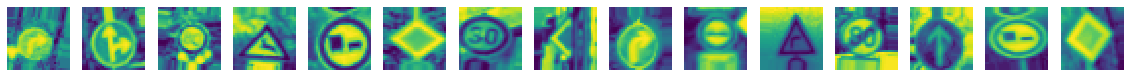

In [40]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis("off")
plt.show()

In [41]:
from keras.utils.np_utils import to_categorical

In [42]:
y_train=to_categorical(y_train,noOfClasses)

In [43]:
y_train.shape

(22271, 43)

In [44]:
y_validation=to_categorical(y_validation,noOfClasses)

In [45]:
y_validation.shape

(5568, 43)

In [46]:
y_test=to_categorical(y_test,noOfClasses)

In [47]:
y_test.shape

(6960, 43)

In [48]:
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
def myModel():
    model=Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation="relu"))
    model.add(Conv2D(60,(5,5),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))  #used to avoid overfitting
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation="softmax"))
    model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [49]:
model=myModel()

In [50]:
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),validation_data=(X_validation,y_validation),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
446/446 [==============================] - 120s 269ms/step - loss: 2.8155 - accuracy: 0.2219 - val_loss: 1.1572 - val_accuracy: 0.6239
Epoch 2/20
446/446 [==============================] - 127s 285ms/step - loss: 1.2742 - accuracy: 0.6109 - val_loss: 0.4342 - val_accuracy: 0.8574
Epoch 3/20
446/446 [==============================] - 125s 280ms/step - loss: 0.8510 - accuracy: 0.7355 - val_loss: 0.2807 - val_accuracy: 0.9043
Epoch 4/20
446/446 [==============================] - 122s 274ms/step - loss: 0.6635 - accuracy: 0.7923 - val_loss: 0.1747 - val_accuracy: 0.9497
Epoch 5/20
446/446 [==============================] - 125s 280ms/step - loss: 0.5430 - accuracy: 0.8269 - val_loss: 0.1499 - val_accuracy: 0.9565
Epoch 6/20
446/446 [==============================] - 123s 276ms/step - loss: 0.4605 - accuracy: 0.8546 - val_loss: 0.1000 - val_accuracy: 0.9734
Epoch 7/20
446/446 [============================

In [51]:
import numpy as np
import cv2
def getClassName(classNo):
    if classNo==0: return 'Speed limit 20 km/h'
    elif classNo==1: return 'Speed limit 30 km/h'
    elif classNo==2: return 'Speed limit 50 km/h'
    elif classNo==3: return 'Speed limit 60 km/h'
    elif classNo==4: return 'Speed limit 70 km/h'
    elif classNo==5: return 'Speed limit 80 km/h'
    elif classNo==6: return 'End of Speed Limit 80 km/h'
    elif classNo==7: return 'Speed limit 100 km/h'
    elif classNo==8: return 'Speed limit 120 km/h'
    elif classNo==9: return 'No passing'
    elif classNo==10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo==11: return 'Right-of-way at the next intersection'
    elif classNo==12: return 'Priority road'
    elif classNo==13: return 'Yield'
    elif classNo==14: return 'Stop'
    elif classNo==15: return 'No vechiles'
    elif classNo==16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo==17: return 'No entry'
    elif classNo==18: return 'General caution'
    elif classNo==19: return 'Dangerous curve to the right'
    elif classNo==20: return 'Dangerous curve to the left'
    elif classNo==21: return 'Double curve'
    elif classNo==22: return 'Bumpy road'
    elif classNo==23: return 'Slippery road'
    elif classNo==24: return 'Road narrows on the right'
    elif classNo==25: return 'Road work'
    elif classNo==26: return 'Traffic signals'
    elif classNo==27: return 'Pedestrians'
    elif classNo==28: return 'Children crossing'
    elif classNo==29: return 'Bicycles crossing'
    elif classNo==30: return 'Beware of ice/snow'
    elif classNo==31: return 'Wild animals crossing'
    elif classNo==32: return 'End of all speed and passing limits'
    elif classNo==33: return 'Turn right ahead'
    elif classNo==34: return 'Turn left ahead'
    elif classNo==35: return 'Ahead only'
    elif classNo==36: return 'Go straight or right'
    elif classNo==37: return 'Go straight or left'
    elif classNo==38: return 'Keep right'
    elif classNo==39: return 'Keep left'
    elif classNo==40: return 'Roundabout mandatory'
    elif classNo==41: return 'End of no passing'
    elif classNo==42: return 'End of no passing by vechiles over 3.5 metric tons'

In [52]:
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)

True

In [55]:
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    success,imgOriginal=cap.read()
    img=np.asarray(imgOriginal)
    img=cv2.resize(img,(32,32))
    img=preprocessing(img)
    img=img.reshape(1,32,32,1)
    cv2.putText(imgOriginal,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOriginal,"Probability: ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    probabilities=model.predict(img)
    classIndex=model.predict_classes(img)
    probabilityValue=np.amax(probabilities)
    if probabilityValue>0.75:
        cv2.putText(imgOriginal,str(classIndex) + " "+ str(getClassName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgOriginal,str(round(probabilityValue*100,2)) + "%",(120,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1) and 0xFF==ord("q"):
        break

KeyboardInterrupt: 